# Bonus exercises.


**Name: Ujjwal Upadhyay**  
**Student ID: 12462784**

## Exercise 1: Time complexity

(1A) What is the time complexity of  the following algorithms, as a function of the number N of elements of mylist from position first to position last? Justify your answer.


In [1]:
import numpy
def random_max(N):
    array = numpy.random.randint(1, 100000000, N)
    return max(array)

def random_avg(N):
    maxes = [ ]
    for attempt in range(N):
        maxes.append(random_max(N))
    print(maxes)
    return sum(maxes)/N

(1B) What is the  time complexity of  function random_max  as a function of N?  
Ans: The time complexity of  function random_max  as a function of N is $\mathcal{O}(N)$  


(1C) What is the  time complexity of  function random_avg  as a function of N?  
Ans: the  time complexity of  function random_max  as a function of N is $\mathcal{O}(N^2))$  

(1D) What  is the  space complexity of  function random_max  as a function of N?  
Ans: The space complexity of  function random_max  as a function of N is $\mathcal{O}(N)$  

(1E) What is  the space complexity  of function random_avg  as a function of N?  
Ans: The space complexity of  function random_avg as a function of N is $\mathcal{O}(N)$.

## Exercise 2 - recursive graphics
<!-- rubric={code:8,reasoning:2} -->

In this exercise you will use recursion to draw the Sierpinski triangle. An image of one such triangle (depth 7) is shown below.

![](sierpinski_7.png)

To help you do this, we are providing some code in the cell below. The `draw_triangle` function draws a triangle for you. When you are done calling `draw_triangle` as many times as you wish, call `show_triangles` once to render everything to the screen. **You do not need to understand how the code below works. You only need to understand how to use it.** In other words, read the comments above each function and the sample usage below the functions, but you don't need to read the code inside the functions.

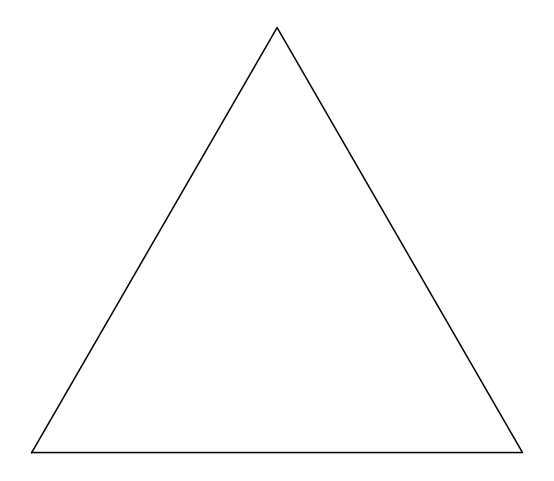

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# draw an equilateral triangle at (x,y) with side length side_length.
# the convention is that (x,y) represents the midpoint of the base, not the centre of the triangle
def draw_triangle(x, y, side):
    height = np.sqrt(3)*side/2;
    plt.plot([x-side/2.0, x+side/2.0, x, x-side/2.0],[y, y, y+height, y], 'k')

# make the Sierpinski triangle image look pretty.
def show_triangles(save=False):
    plt.gcf().set_size_inches(10,8.6)
    plt.axis('scaled')
    plt.axis('off')
    plt.tick_params(labelbottom='off', labelleft='off')
    if save:
        plt.tight_layout()
        plt.savefig('sierpinski.png')
    plt.show()
    
draw_triangle(0,0,1) # example: a single triangle
show_triangles() # show the triangle

Another example is given below: a Sierpinski triangle with depth 1, drawn without using recursion but just by calling `draw_triangles` 3 times. The point of this is that we provide you with (most of) the geometry, so you can focus on recursion and be less likely to get stuck on the geometry aspects.

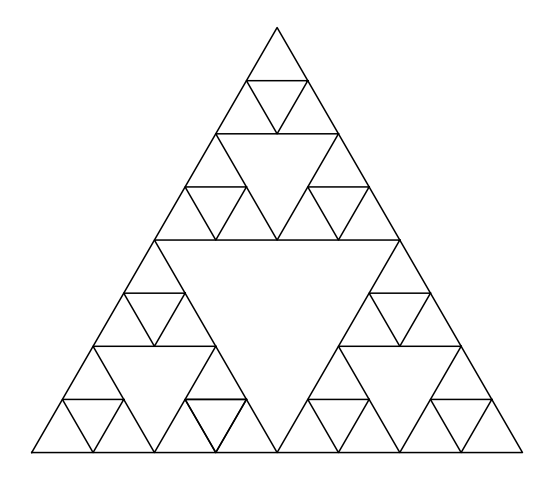

In [3]:
#n=1
draw_triangle(0, 0, 1)

#n=2
draw_triangle(0, np.sqrt(3)*(0.5)/2, -0.5)

#n=3
draw_triangle(0, np.sqrt(3)*(0.75)/2, -0.25)
draw_triangle(0.25, np.sqrt(3)*(0.25)/2, -0.25)
draw_triangle(-0.25, np.sqrt(3)*(0.25)/2, -0.25)

#n=4
draw_triangle(-0.125, np.sqrt(3)*(0.125)/2, -0.125)
draw_triangle(-0.125, np.sqrt(3)*(0.125)/2, -0.125)
draw_triangle(-0.375, np.sqrt(3)*(0.125)/2, -0.125)
draw_triangle(0.125, np.sqrt(3)*(0.125)/2, -0.125)
draw_triangle(0.375, np.sqrt(3)*(0.125)/2, -0.125)
draw_triangle(-0.25, np.sqrt(3)*(0.375)/2, -0.125)
draw_triangle(0.25, np.sqrt(3)*(0.375)/2, -0.125)
draw_triangle(-0.125, np.sqrt(3)*(0.625)/2, -0.125)
draw_triangle(0.125, np.sqrt(3)*(0.625)/2, -0.125)
draw_triangle(0, np.sqrt(3)*(0.875)/2, -0.125)

show_triangles()

Your tasks are as follows:    
1. Spend a few minutes contemplating how you would implement this without recursion. Once you have reached a sufficiently hopeless state of mind, record your thoughts here as part of your submission.
2. Write a recursive function `sierpinski` that takes four arguments: the depth `n`, the coordinates `x` and `y`, and the side length of the outermost triangle, `size`. Then, use your function to reproduce the figure above of the Sierpinski triangle with depth 7. Hint: your function should call itself 3 times
3. What is the running time of your code, as a function of $n$?

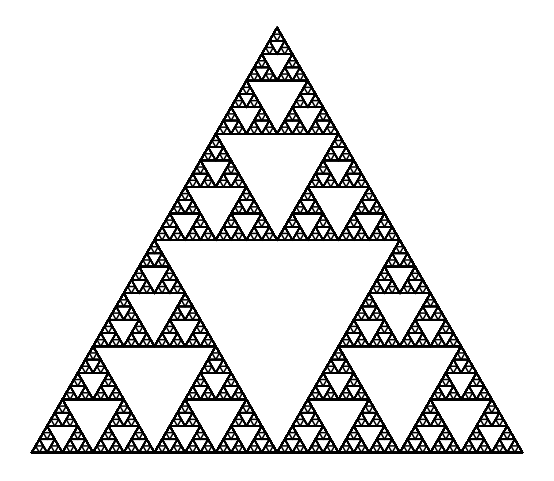

In [8]:
def sierpienski(x,y,size,n):

    '''
    Draws a Sierpienski triangle using recursion
    Inputs: Given depth n, the coordinates x and y, 
    and the side length of the outermost triangle,size
    Output: Sierpienski triangle
    '''
    
    #print(x,y,size,n)

    while(n>=2):
        
        #Call draw_triangle recursively 
        draw_triangle(x - size/2, y, size)
        draw_triangle(x + size/2, y, size)
        draw_triangle(x, y + size * (np.sqrt(3)/2), size)
        
        #Reduce the value of n at each iteration
        n -= 1
        
        #Call sierpienski() recursively
        sierpienski(x - size/2, y, size/2, n)
        sierpienski(x + size/2, y, size/2, n)
        sierpienski(x, y + size*(np.sqrt(3)/2), size/2, n)
        

sierpienski(0,0,1,7) 
show_triangles() # show the triangle

__The running time of this code is $\mathcal{O}(N)$__

## EXERCISE 3: Discrete Optimization - Linear Programming -

A company produces two types of tables, T1 and T2. It takes 2 hours to produce the parts of one unit of T1, 1 hour to assemble and 2 hours to polish.It takes 4 hours to produce the parts of one unit of T2, 2.5 hour to assemble and 1.5 hours to polish. Per month, 7000 hours are available for producing the parts, 4000 hours for assembling the parts and 5500 hours for polishing the tables. The profit per unit of T1 is 90 dollarsand per unit of T2 is 110 dollars. How many of each type of tables should be produced in order to maximize the total monthly profit?

- Formulate the problem of deciding how much of each product to make in the current week as a linear program.
- Solve this linear program using the Pulp library (https://pythonhosted.org/PuLP/).
- The skeleton of the code is provided below

In [13]:
# import PuLP
import pulp

In [16]:
prob = pulp.LpProblem("tables", pulp.LpMaximize)

# Initiate the variables:
# Set Up Problem Variables: 
x1 = pulp.LpVariable("x1", lowBound = 0) # "x1" for Bowls
x2 = pulp.LpVariable("x2", lowBound = 0) # "x2" for Mugs

prob += 90 * x1 + 110 * x2 

# Create Constraints: 
prob +=  2 * x1 + 4 * x2  <= 7000
prob += x1 + 2.5 * x2 <= 4000
prob += 2 * x1 + 1.5 * x2 <= 5500

print(prob)

status = prob.solve()

# The status of the solution is printed to the screen
print("Status:", pulp.LpStatus[prob.status])

tables:
MAXIMIZE
90*x1 + 110*x2 + 0
SUBJECT TO
_C1: 2 x1 + 4 x2 <= 7000

_C2: x1 + 2.5 x2 <= 4000

_C3: 2 x1 + 1.5 x2 <= 5500

VARIABLES
x1 Continuous
x2 Continuous

Status: Optimal


In [12]:
print("We obtained a maximun of $%d revenue making %d bowls and %d mugs per week" % 
      (pulp.value(prob.objective)/4, pulp.value(x1)/4, pulp.value(x2)/4))

We obtained a maximun of $68250 revenue making 575 bowls and 150 mugs per week
